## İmport & Data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Veri düzenleme

In [3]:
df = pd.read_csv("community_health_MLR.csv")

In [4]:
df.head()

,yas,cins,irk,kilo,boy,visits
0,47,0,4,112.0,165.0,28
1,26,1,3,128.0,168.0,23
2,26,1,2,91.0,173.0,14
3,39,1,3,108.0,185.0,21
4,55,1,1,90.0,155.0,27


## Veri düzenleme

In [5]:
df["VKİ"] = round(df["kilo"] / (df["boy"] / 100)**2,2)

In [6]:
df.head()

,yas,cins,irk,kilo,boy,visits,VKİ
0,47,0,4,112.0,165.0,28,41.14
1,26,1,3,128.0,168.0,23,45.35
2,26,1,2,91.0,173.0,14,30.41
3,39,1,3,108.0,185.0,21,31.56
4,55,1,1,90.0,155.0,27,37.46


In [7]:
# df.to_csv("Community_health_evolve.csv",index= False)

<Axes: xlabel='visits', ylabel='VKİ'>

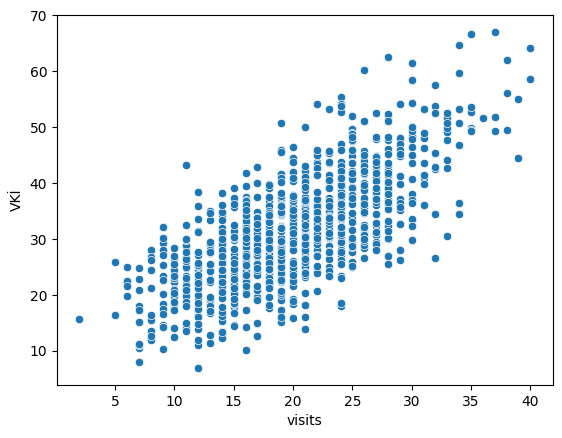

In [8]:
sns.scatterplot(df, x="visits", y="VKİ")

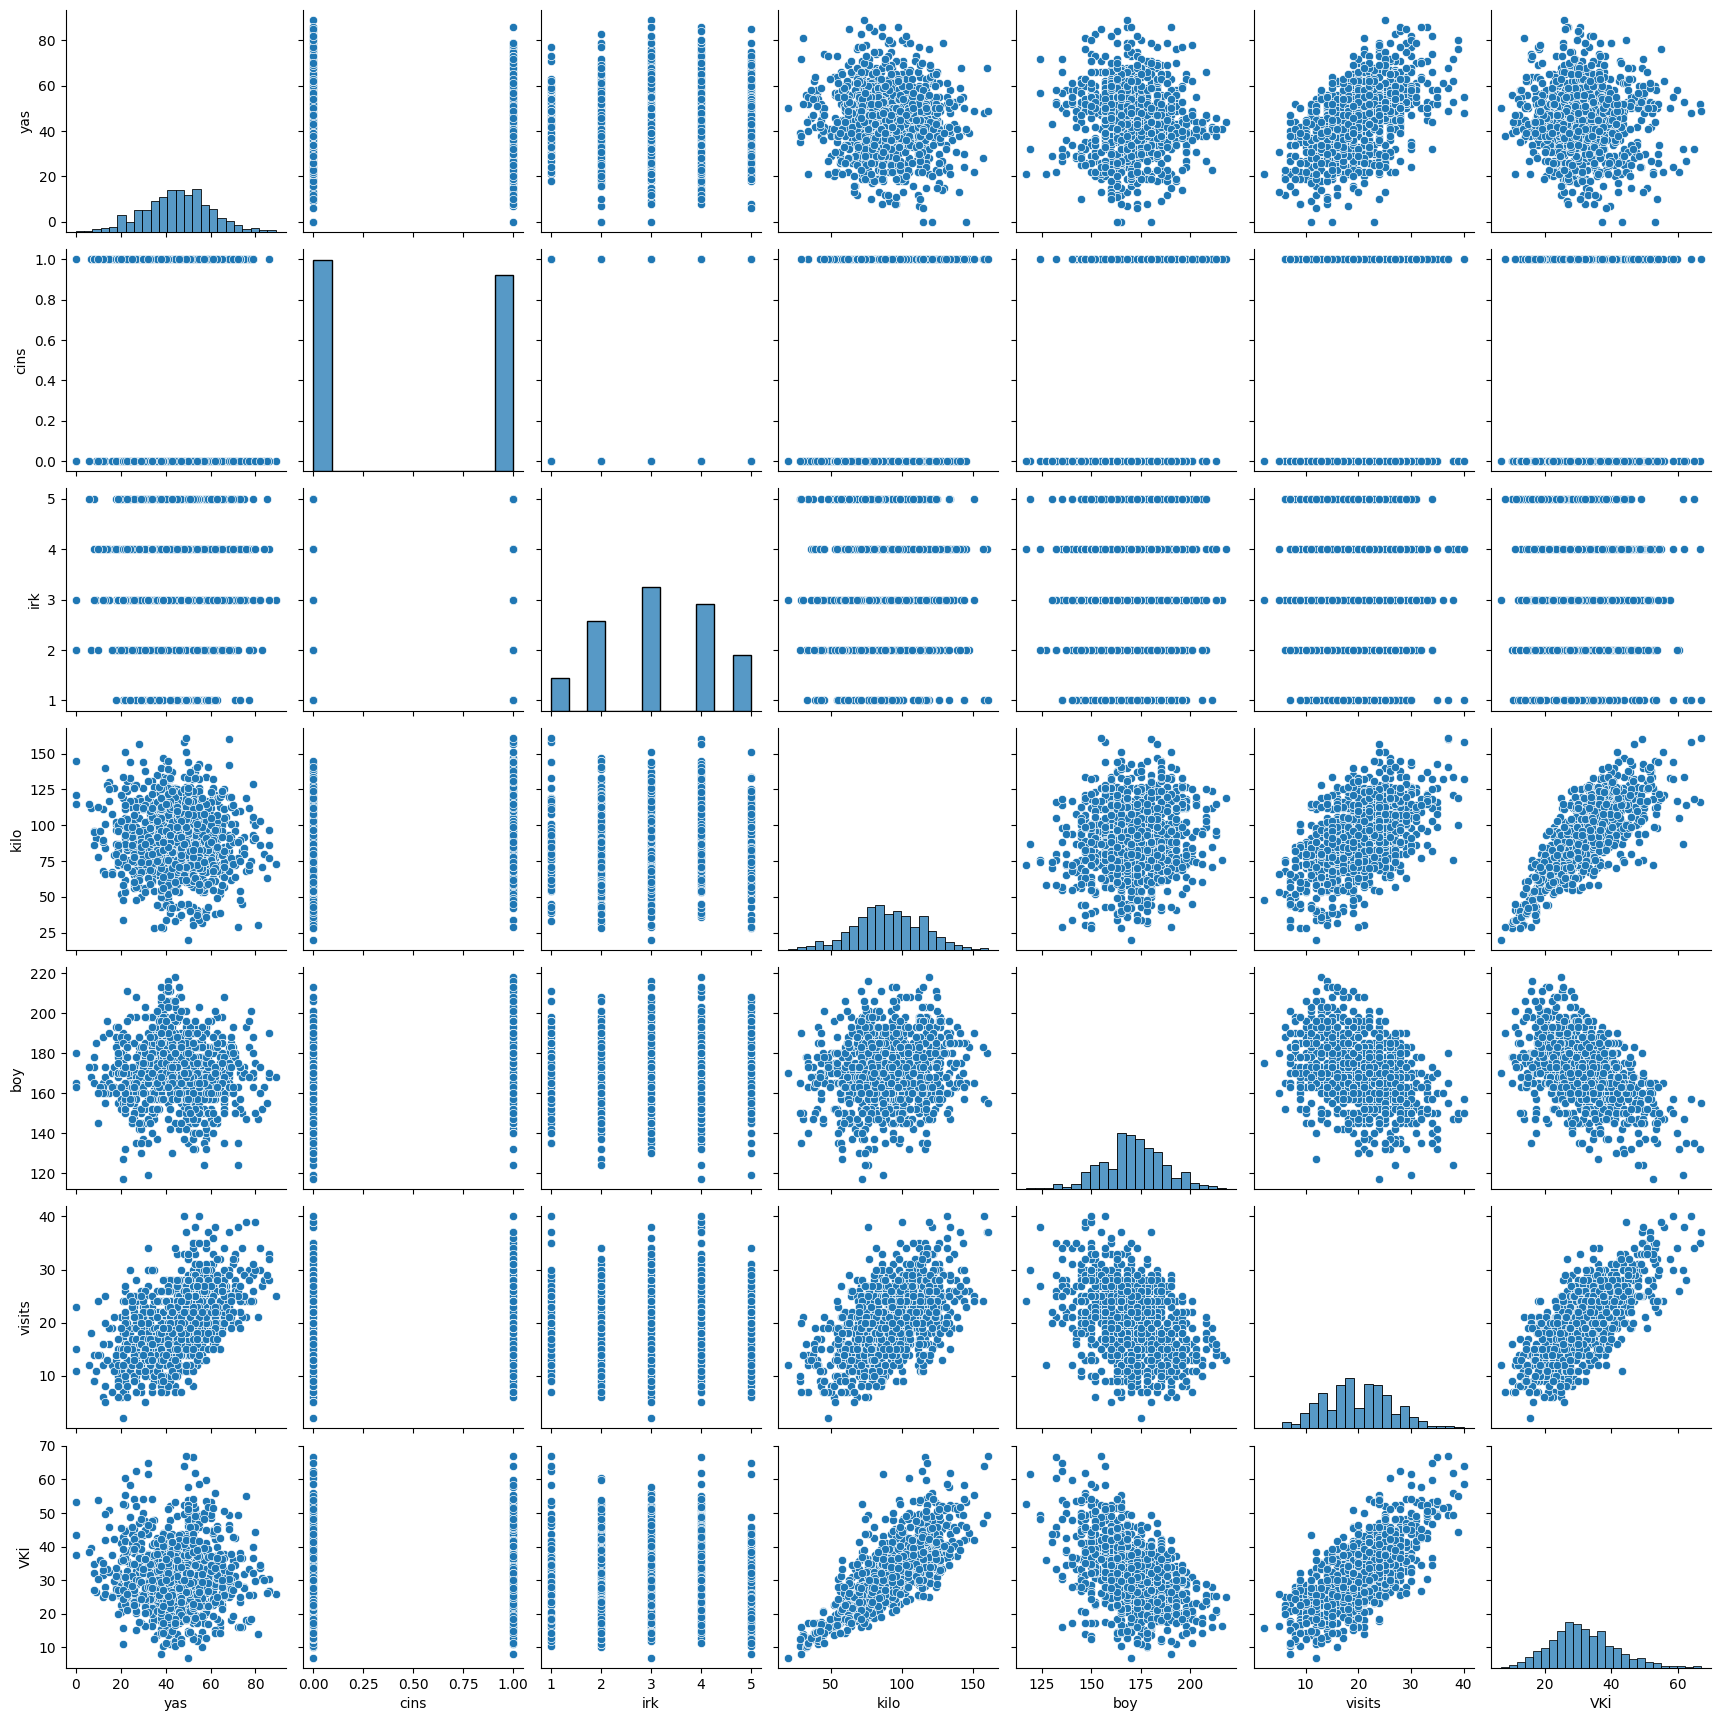

In [9]:
sns.pairplot(df)

In [10]:
df.corr() #0.723

,yas,cins,irk,kilo,boy,visits,VKİ
yas,1.000000,0.023866,0.009756,-0.084289,-0.063454,0.539543,-0.041251
cins,0.023866,1.000000,0.030425,0.271128,0.296501,0.066747,0.050244
irk,0.009756,0.030425,1.000000,0.017290,0.031233,0.006324,-0.006773
kilo,-0.084289,0.271128,0.017290,1.000000,0.140551,0.543558,0.772637
boy,-0.063454,0.296501,0.031233,0.140551,1.000000,-0.386140,-0.493531
visits,0.539543,0.066747,0.006324,0.543558,-0.386140,1.000000,0.723867
VKİ,-0.041251,0.050244,-0.006773,0.772637,-0.493531,0.723867,1.000000


## train test split

In [13]:
X = df.drop("visits",axis=1) #axis 0 = satir , axis 1 = sütun

In [14]:
y = df["visits"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X.head()

,yas,cins,irk,kilo,boy,VKİ
0,47,0,4,112.0,165.0,41.14
1,26,1,3,128.0,168.0,45.35
2,26,1,2,91.0,173.0,30.41
3,39,1,3,108.0,185.0,31.56
4,55,1,1,90.0,155.0,37.46


In [18]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [20]:
X_train.head()

,yas,cins,irk,kilo,boy,VKİ
916,43,1,4,42.0,168.0,14.88
234,48,1,3,76.0,168.0,26.93
711,23,0,4,97.0,183.0,28.96
532,56,0,3,73.0,163.0,27.48
289,50,1,3,78.0,178.0,24.62


# Lin reg

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regr = LinearRegression()

In [23]:
regr.fit(X_train,y_train)

LinearRegression()

In [24]:
test_pred = regr.predict(X_test)

In [30]:
test_pred

array([25.28945757, 16.47650359, 15.59522645, 12.10172552, 28.48120361,
       12.28613005, 18.49674867, 14.67586615, 26.07344793, 16.40850116,
       13.64348597, 17.17789708, 17.11391062, 14.3525354 , 28.06400347,
       11.99781496, 17.6670209 , 21.68624556, 24.50369247, 12.65705951,
       11.48512728, 31.22152474, 20.11964344, 16.75103176, 22.25405162,
       22.76102116, 22.02262765, 14.76518197, 32.56993775, 16.12049512,
       17.93218722, 28.04650386, 22.5876537 , 30.23297347, 27.27319786,
       13.91655239, 18.27026437, 20.69355719, 10.83313914, 24.62201019,
       18.9302035 , 18.51015713, 24.71870598, 20.75258144, 13.1102935 ,
       16.98553783, 24.56892066,  8.79214615, 19.87580083, 30.15055414,
       20.52746784, 24.20393037, 23.07196894, 16.54672493,  8.59333368,
       17.64018263, 14.63679581, 16.98623559, 30.39004916, 20.67542338,
       21.61548373, 18.72619645, 12.93499984, 24.58708964, 17.88242971,
       14.55950601, 19.0934787 , 13.80513262, 15.91566476, 36.71

## Performans

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
print("R^2 :       ", round(r2_score(y_test,test_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,test_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,test_pred)),2)) # hastane ziyareti 1 den bir tık daha iyi bir model

R^2 :        0.86
MAE :        2.1
RMSE :       2.46
